In [1]:
from core.scenario import Scenario, Frame, AgentState
from core.feature_extraction import FeatureExtractor
from core.data_processing import get_dataset
from core.lanelet_helpers import LaneletHelpers
from igp2.maneuver import FollowLane, SwitchLane, Turn, ManeuverConfig
from igp2.util import get_curvature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scenario = Scenario.load('../scenario_config/heckstrasse.json')

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


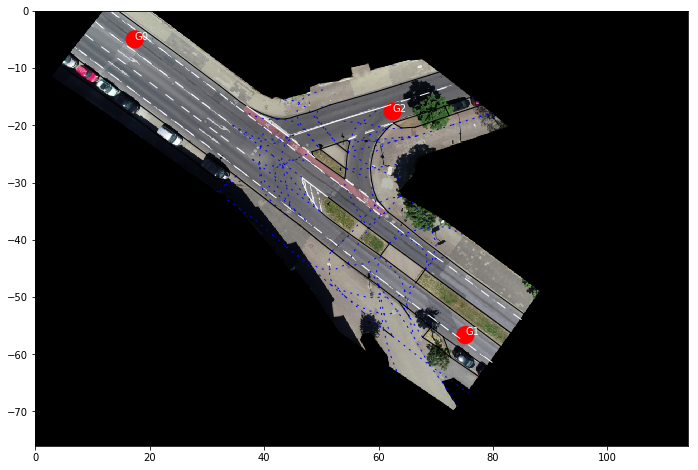

In [3]:
plt.figure(figsize=(12, 8))
scenario.plot()

In [4]:
feature_extractor = FeatureExtractor(scenario.lanelet_map)
frame = Frame(0)
state = AgentState(0, 13.8, -10.0, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
agent_id = 0
config = ManeuverConfig({'termination_point': (76.5, -57.3),
                         'initial_lanelet_id': -1770699,
                         'final_lanelet_id': -1770828})
maneuver = FollowLane(agent_id, frame, feature_extractor, config)

path, velocity = maneuver.path, maneuver.velocity

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


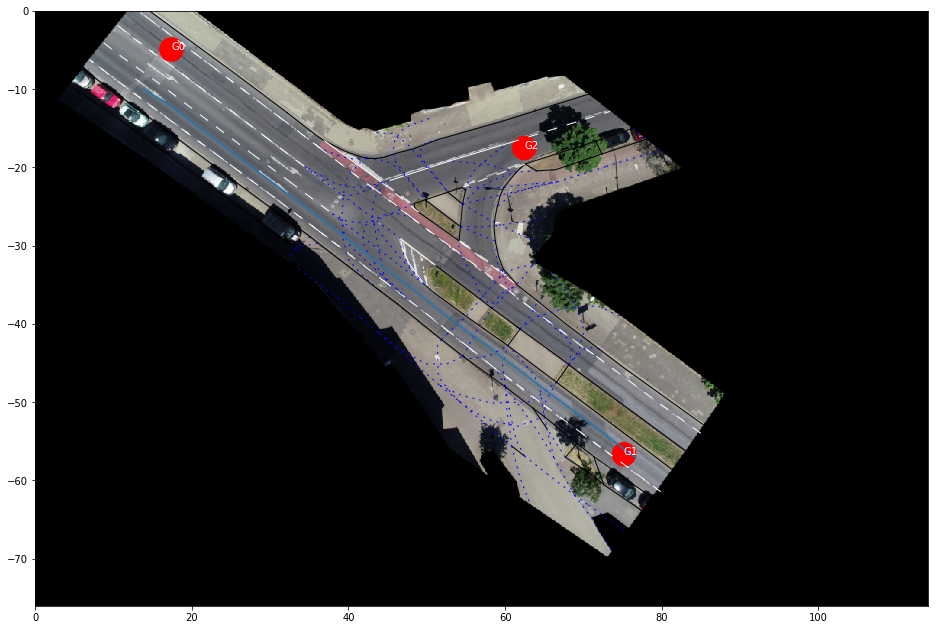

In [5]:
x = path[:, 0]
y = path[:, 1]
plt.figure(figsize=(16, 16))
scenario.plot()
plt.plot(x, y)

In [6]:
curvature = get_curvature(path)

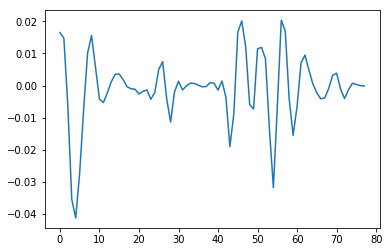

In [7]:
plt.plot(curvature)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


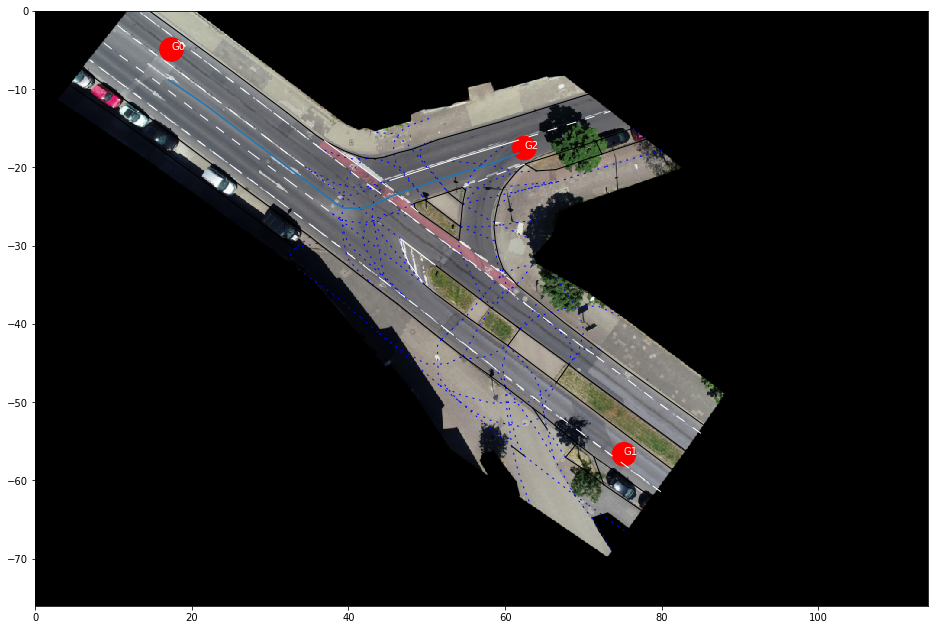

In [8]:
feature_extractor = FeatureExtractor(scenario.lanelet_map)
frame = Frame(0)
state = AgentState(0, 17.01, -8.83, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
config = ManeuverConfig({'termination_point': (61.83, -18.49),
                         'initial_lanelet_id': -1770700,
                         'final_lanelet_id': -1770707})
maneuver = FollowLane(agent_id, frame, feature_extractor, config)


x = maneuver.path[:, 0]
y = maneuver.path[:, 1]
plt.figure(figsize=(16, 16))
scenario.plot()
plt.plot(x, y)

In [9]:
from igp2.macro_action import ContinueLane

In [10]:
agent_id = 0
frame = Frame(0)
state = AgentState(0, 21.2, -15.4, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
goal = scenario.config.goals[1]
macro = ContinueLane(agent_id, frame, feature_extractor, goal)
follow_maneuver = macro.maneuvers[0]

In [11]:
config = ManeuverConfig({'termination_point': (37.9, -24.4),
                         'initial_lanelet_id': -1770700,
                         'final_lanelet_id': -1770712})
switch_maneuver = SwitchLane(agent_id, frame, feature_extractor, config)

frame = Frame(0)
state = AgentState(0, 37.9, -24.4, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
config = ManeuverConfig({'termination_point': (46.5, -23.4),
                         'initial_lanelet_id': -1770701,
                         'final_lanelet_id': -1770701})
turn_maneuver = SwitchLane(agent_id, frame, feature_extractor, config)


ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


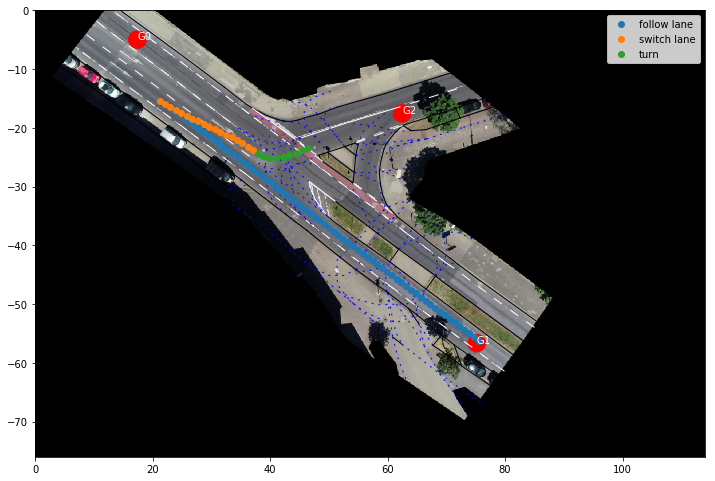

In [12]:



plt.figure(figsize=(12, 12))
scenario.plot()
plt.plot(follow_maneuver.path[:, 0],
         follow_maneuver.path[:, 1], 'o', label='follow lane')
plt.plot(switch_maneuver.path[:, 0],
         switch_maneuver.path[:, 1], 'o', label='switch lane')
plt.plot(turn_maneuver.path[:, 0],
         turn_maneuver.path[:, 1], 'o', label='turn')
plt.legend()

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


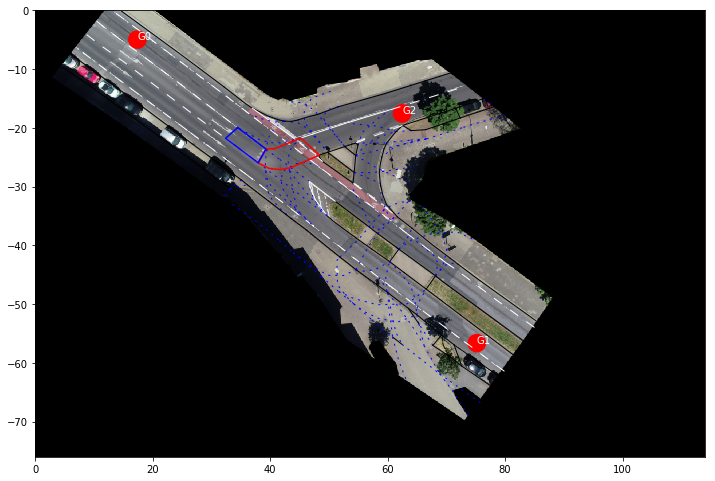

In [13]:
l = feature_extractor.lanelet_map.laneletLayer.get(-1770701)
l_prev = feature_extractor.routing_graph.previous(l)[0]
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot(l, color='red', )
LaneletHelpers.plot(l_prev, color='blue')

In [14]:
np.linalg.norm(np.diff(maneuver.path, axis=0), axis=1)

array([1.02678521, 1.0269251 , 1.02691157, 1.02675325, 1.02654002,
       1.02644306, 1.02661818, 1.02679287, 1.02675613, 1.02667902,
       1.02664746, 1.02670551, 1.02670981, 1.02663877, 1.02670216,
       1.02664674, 1.02669968, 1.02668485, 1.02667162, 1.02672099,
       1.02663334, 1.02652922, 1.0301167 , 1.02647047, 1.01449414,
       1.03011674, 1.04402149, 1.01699323, 1.02284611, 1.03407746,
       1.0287354 , 1.02347484, 1.02691483, 1.02769988, 1.02611663,
       1.0268541 , 1.02664005, 1.02670231, 1.02668637, 1.02667203,
       1.02668549, 1.0266633 , 1.02681106, 1.02702076, 1.026688  ,
       1.02613884, 1.02630841, 1.0268898 , 1.02718491, 1.02694193])

In [34]:
def sig(x):
    return 1/(1+np.exp(-x))

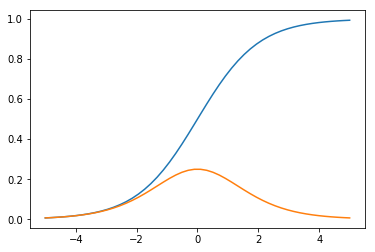

In [35]:
x = np.linspace(-5, 5)
y = sig(x)
plt.plot(x, y)

dsig = y*(1-y)
plt.plot(x, dsig)

In [36]:
[lanelet.id for lanelet in list(feature_extractor.routing_graph.shortestPath(l_prev, l))]

[-1770712, -1770701]

In [48]:
np.concatenate([[0], np.cumsum(np.linalg.norm(np.diff(path, axis=0), axis=1))])

array([ 0.        ,  1.02025858,  2.04137269,  3.06167832,  4.0804187 ,
        5.09991081,  6.12100814,  7.1428517 ,  8.16411168,  9.1844497 ,
       10.2046911 , 11.22502426, 12.24533928, 13.26563774, 14.28593149,
       15.30623459, 16.32654157, 17.34684459, 18.36714076, 19.38743946,
       20.40775302, 21.42805214, 22.44834336, 23.46864356, 24.48895217,
       25.50926915, 26.52956602, 27.54995432, 28.57028677, 29.59054052,
       30.61085682, 31.63116116, 32.65145977, 33.67175829, 34.69205982,
       35.71236381, 36.73266811, 37.75297035, 38.7732693 , 39.79357358,
       40.81389162, 41.83415175, 42.85442564, 43.87493191, 44.89489454,
       45.9153204 , 46.93574414, 47.95622801, 48.9764982 , 49.99685144,
       51.01715243, 52.03726663, 53.05739928, 54.07816794, 55.09814305,
       56.11826009, 57.13879968, 58.15911908, 59.17956029, 60.19974687,
       61.21998842, 62.24041271, 63.26072714, 64.28104755, 65.30138184,
       66.3216981 , 67.34199202, 68.36227719, 69.38258386, 70.40

In [49]:
path

array([[ 13.8       , -10.        ],
       [ 14.65919119, -10.55019821],
       [ 15.5371271 , -11.07164098],
       [ 16.41062687, -11.59891866],
       [ 17.25825435, -12.16403775],
       [ 18.07860985, -12.76933191],
       [ 18.88310443, -13.39816275],
       [ 19.6833575 , -14.03358331],
       [ 20.49098848, -14.65864663],
       [ 21.31255173, -15.26372802],
       [ 22.13612121, -15.86591225],
       [ 22.95529162, -16.47422105],
       [ 23.77080374, -17.08739534],
       [ 24.58480188, -17.70255059],
       [ 25.39973572, -18.31645787],
       [ 26.21731513, -18.92685311],
       [ 27.03737391, -19.53391976],
       [ 27.85877703, -20.13915953],
       [ 28.67949854, -20.74531172],
       [ 29.49923255, -21.35280295],
       [ 30.31917042, -21.96004396],
       [ 31.13684031, -22.57031132],
       [ 31.95222417, -23.18361656],
       [ 32.76990905, -23.79386564],
       [ 33.58182476, -24.41178356],
       [ 34.39225259, -25.03166538],
       [ 35.20594371, -25.64722403],
 